In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import plotly.express as px
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.models import Model

In [44]:
import plotly.graph_objects as go

In [45]:
data = pd.read_csv("data_.csv")

In [46]:
data

,obs,Time
0,0.000042,2022-08-31 09:00:00
1,0.000037,2022-08-31 09:00:10
2,0.000037,2022-08-31 09:00:20
3,0.000035,2022-08-31 09:00:30
4,0.000036,2022-08-31 09:00:40
...,...,...
511,0.000053,2022-08-31 10:25:10
512,0.000054,2022-08-31 10:25:20
513,0.000053,2022-08-31 10:25:30
514,0.000051,2022-08-31 10:25:40


In [183]:
fig = px.line(y = data.obs , x = data.Time, labels={"x":"Time","y":"Reading"})
fig.update_layout(xaxis = dict(rangeslider=dict(visible=True)))

In [85]:
X = data["obs"].values

In [86]:
scaler = StandardScaler()

In [87]:
X = X.reshape(-1,1)

In [88]:
X = scaler.fit_transform(X)

In [89]:
def preprocess(X, time_steps=5):
    x_values = []
    y_values = []

    for i in range(len(X)-time_steps):
        x_values.append(X[i:(i+time_steps)])        
        y_values.append(X[(i+time_steps)])
        
    return np.array(x_values), np.array(y_values)

In [90]:
X,y = preprocess(X)

In [91]:
X.shape

(511, 5, 1)

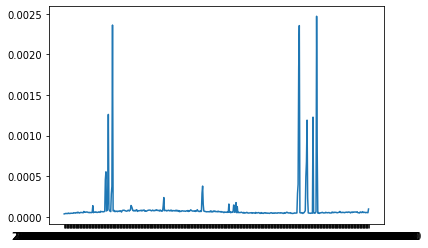

In [92]:
plt.plot(data.Time[5:] , scaler.inverse_transform(y))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.metrics import mean_absolute_error

In [96]:
from tensorflow import keras
from tensorflow.keras import losses
from tensorflow.keras import metrics as k_metrics
from tensorflow.keras import optimizers

In [94]:
X_train , X_test , y_train, y_test = train_test_split(X,y,train_size=0.70,shuffle=False)

In [152]:
model = Sequential()

#1
model.add(LSTM(units=128, return_sequences=True, input_shape=(X.shape[1] , X.shape[2])))
#2
model.add(LSTM(units=64 , activation = "relu", return_sequences=True , kernel_regularizer=keras.regularizers.l2(0.1) )) 
#3
model.add(Dropout(0.1))
#4
model.add(LSTM(units=32, activation = "tanh", return_sequences=True , kernel_regularizer=keras.regularizers.l2(0.01) ))
#5
model.add(Dropout(0.2))
#6
model.add(LSTM(units=10,return_sequences=False ))

#DROPOUT
model.add(Dropout(0.5))

#OUTPUT
model.add(Dense(y.shape[1])) #output layer


In [153]:
opmz = optimizers.Adam(learning_rate=0.05)
loss = losses.mean_squared_error

model.compile(optimizer = opmz , loss = loss)

In [154]:
history = model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test,y_test), verbose=1,shuffle=False) #100e #32b

Epoch 1/25
2/2 [==============================] - 9s 1s/step - loss: 14.7112 - val_loss: 3.9814
Epoch 2/25
2/2 [==============================] - 0s 71ms/step - loss: 2.5375 - val_loss: 7.6405
Epoch 3/25
2/2 [==============================] - 0s 70ms/step - loss: 5.6723 - val_loss: 6.3724
Epoch 4/25
2/2 [==============================] - 0s 67ms/step - loss: 4.0149 - val_loss: 4.1408
Epoch 5/25
2/2 [==============================] - 0s 66ms/step - loss: 2.0766 - val_loss: 3.6664
Epoch 6/25
2/2 [==============================] - 0s 70ms/step - loss: 1.7530 - val_loss: 3.9992
Epoch 7/25
2/2 [==============================] - 0s 64ms/step - loss: 2.0783 - val_loss: 3.9701
Epoch 8/25
2/2 [==============================] - 0s 64ms/step - loss: 1.9220 - val_loss: 3.2666
Epoch 9/25
2/2 [==============================] - 0s 68ms/step - loss: 1.2452 - val_loss: 2.9612
Epoch 10/25
2/2 [==============================] - 0s 69ms/step - loss: 1.0119 - val_loss: 3.0242
Epoch 11/25
2/2 [=============

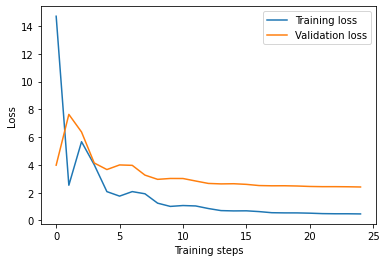

In [157]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend()

In [182]:
model.save("model.h5")

In [ ]:
# model = keras.models.load_model("model.h5")

In [158]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 5, 128)            66560     
                                                                 
 lstm_29 (LSTM)              (None, 5, 64)             49408     
                                                                 
 dropout_21 (Dropout)        (None, 5, 64)             0         
                                                                 
 lstm_30 (LSTM)              (None, 5, 32)             12416     
                                                                 
 dropout_22 (Dropout)        (None, 5, 32)             0         
                                                                 
 lstm_31 (LSTM)              (None, 10)                1720      
                                                                 
 dropout_23 (Dropout)        (None, 10)               

In [162]:
predictions = model.predict(X)

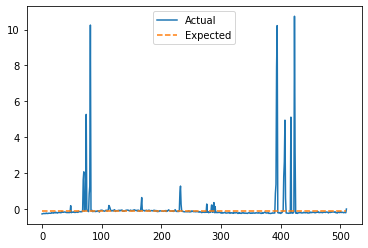

In [163]:
plt.plot(y,label="Actual")
plt.plot(predictions,linestyle="dashed",label="Expected")
plt.legend()

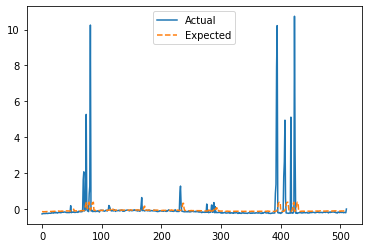

In [34]:
#model1.h5
# plt.plot(y,label="Actual")
# plt.plot(predictions,linestyle="dashed",label="Expected")
# plt.legend()

In [164]:
MAE = np.mean(np.abs(y - predictions), axis=1)

In [166]:
frame = data[5:]

In [167]:
frame["Expected"] = scaler.inverse_transform(predictions)
frame["Divergence"] = MAE

/tmp/ipykernel_2902/758675416.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2902/758675416.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
frame["Anamoly"] = frame.Divergence>0.3

/tmp/ipykernel_2902/2955588389.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
anamolous = frame[frame.Anamoly==True]

In [174]:
anamolous.shape

(25, 5)

In [175]:
# plt.figure(figsize=(24,10))
# sns.lineplot(data=frame,x=frame.Time,y=frame.obs , label = "Observations")
# sns.lineplot(data=frame,x=frame.Time,y=frame.Expected , label = "Expected")
# sns.scatterplot(data=anamolous,x=anamolous.Time, y=anamolous.obs , label="Anamoly" , color="red")

In [176]:
fig = go.Figure(data=go.Scatter(x=frame.Time,y=frame.obs))
fig.add_trace(go.Scatter(x=anamolous.Time,y=anamolous.obs,mode="markers"))
fig.update_layout(xaxis = dict(rangeslider=dict(visible=True)))

In [177]:
q1 = np.quantile(frame.obs,0.25)
q2 = np.median(frame.obs)
q3 = np.quantile(frame.obs,0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [178]:
print(iqr, upper_bound, lower_bound)

2.273499999999999e-05 0.00010760749999999998 1.6667500000000016e-05


In [179]:
outliers = frame.obs[(frame.obs <= lower_bound) | (frame.obs >= upper_bound)]

In [180]:
outliers.shape

(32,)